# 机器学习简介

**机器学习**（**machine learning**）通常被看做是**人工智能**（**artificial intelligence**）的一部分，通常指用一些**算法**（**algorithm**）和**统计模型**（**statistical model**）让计算机通过学习一些特定的模式、特征，完成一些特定的任务，而不需要太多的人工干预。

最常见的机器学习算法可以分为两种:

* **监督学习**（**supervised learning**）：适用于带有**标签**（**labels**）的学习算法，通过算法和模型确定一些**特征**（**features**）的函数，对目标变量进行预测。比如我们常见的各种**回归**（**regression**）在机器学习中是典型的监督学习算法。根据标签的不同，监督学习又可以分为：
    - **分类**（**classification**），标签为离散变量
    - **回归**（**regression**），标签为连续变量
* **无监督学习**（**unsupervised learning**）：适用于没有标签的学习算法，通过发现数据中的结构对数据进行一些操作，比如**聚类**（**clustering**）、**降维**（**dimension reduction**）等。

此外还有**半监督学习**（**semi-supervised learning**），指的是针对标签不完整的数据的学习算法。除了以上分类之外，还有**增强学习**（**reinforcement learning**）等等很多领域。

在机器学习中，通常将已有的数据成为**训练集**（**training set**）或者**训练数据**（**training data**），机器学习的任务就是从训练集中找到特征的特定函数（模式），对新的数据进行预测。学习到的模型对于新样本的预测能力一般称之为**泛化**（**generalization**）能力。

## 过拟合与欠拟合

机器学习的目的是通过对训练集的训练，得到一个函数，对未知的新数据做预测。一方面，模型应该要有足够的预测和拟合能力，如果模型的拟合能力不足，没有发现本可以在训练集中发现的模式，我们称之为**欠拟合**（**underfitting**）；另一方面，如果一味提高拟合和预测能力，那么不可避免的会选择复杂度更高的模型，错误地将一些数据中的噪音当做信号进行拟合，我们称之为**过拟合**（**overfitting**）。

![](pic/fitting.png "过拟合、欠拟合与恰好拟合")

欠拟合会导致预测能力低下，而过拟合会导致虽然在训练集上看起来有非常好的预测效果，但是对于样本外的新数据进来，预测效果却很差，或者说泛化能力很差。两者都是在建模师需要避免的。为此，我们需要更加科学的评价模型的方法。

## 模型评价方法

通常选择不同的模型是在「大模型」和「小模型」之间进行选择。小模型更容易欠拟合，而大模型更容易过拟合，评价模型主要是为了使模型能够恰好拟合，达到最优的预测效果。

在线性回归中，我们通常会使用$R^2$作为拟合程度的一个度量。然而$R^2$一般不能作为模型选择的标准，过高的$R^2$可能是过拟合的体现。为此针对线性回归，至少有这些标准可以使用：

* 调整的$R^2$，即：$$\bar{R}^{2}=1-\frac{\hat{e}'\hat{e}/\left(N-K\right)}{Y'M_{0}Y/\left(N-1\right)}=1-\frac{N-1}{N-K}\left(1-R^{2}\right)$$
* 赤池信息准则（Akaike information creterion,AIC）：$$AIC=-2Log\_Likelihood+2K$$
* 贝叶斯信息准则（Bayesian information creterion,BIC，又称施瓦茨信息准则，Schwarz information creterion,SIC）：$$BIC=-2Log\_Likelihood+\ln\left(N\right)K$$

其中AIC、BIC适用于所有使用极大似然估计的统计模型。

以上的准则都是在拟合程度的度量基础上，对变量个数进行惩罚，避免选出比较「大」的模型。

然而以上标准要么只适用于线性回归（调整的$R^2$），要么只适用于极大似然估计，通用性比较差，特别是很多机器学习方法并不依赖于统计方法，这些模型评价的指标通常不能直接用于机器学习中。

其中的一个解决方法是使用所谓的**交叉验证**（**cross validation**）。

注意到，不管是欠拟合还是过拟合，都会导致样本外预测的误差变大，因而我们可以只使用一部分样本进行估计，而在另外一部分样本中检验模型的预测能力。在交叉验证法中，我们将样本分为两部分：**训练集**（**training set**）用于估计模型、**验证集**（**validation set**）用于评价模型的样本外预测能力。交叉验证常见的用法如：

* **S折交叉验证**（**S-fold cross validation**）：将$N$个样本随机的分为大小相同的$S$组，然后利用$S-1$组的数据对数据进行拟合，并使用该模型对剩下的一组计算目标函数值（在这里即预测误差的度量，如误差平方）。将这一过程对$S$种组合重复进行，最终得到了$N$个目标函数值的加总（如均方误差）。对于不同的模型，选择使得验证集目标函数最优的那个，或者预测误差最小的那个模型。

* **留一验证**（**leave-one-out cross validation**）：即$S=N$的$S$折交叉验证的特殊情形，每一次都用$N-1$个样本训练模型，对剩下的一个样本进行预测。

可见，交叉验证的主要缺点是运算时间：对于$S$折交叉验证，必须重复估计模型$S$次，而对于留一验证，必须对模型估计$N$次。但是由于交叉验证度量了样本外预测的效果，因而可以有效避免欠拟合、过拟合。

## 模型选择的常用方法：正则化

虽然交叉验证提供了一个评价模型的很好的标准，但是我们潜在的有非常多模型可以选择，而交叉验证本身就是非常耗时的一个计算，因而大多数情况我们并不会直接使用交叉验证去评价每一个潜在的模型。而对于大量的基于参数的模型（比如各种回归模型、神经网络模型等等），有一个比较通用的限制模型不能太多「大」的方法，即**正则化**（**regularization**）。

正则化可以看做是**收缩估计量**（**shrinkage estimator**）的一种推广，其基本原理是统计学中经典的**偏差-方差权衡**（**bias-variance tradeof**）。

对于预测问题，一个通常的性能度量是所谓的「**均方误差**」（**mean squared error, MSE**）：$$MSE=E\left[y-f\left(x\right)\right]^2$$而均方误差可以被分解为偏差的平方加上方差：$$MSE=Bias^2+Variance$$。问题是，bias和variance通常不太可能同时降低，如果要做到无偏，那么variance就会变大；如果想要降低variance，bias也会变大，就产生了矛盾。

原始的统计学中，对于无偏性（或者渐进无偏性）是非常执着的，通常要求预测无偏，然而很快统计学家们发现无偏并不代表$MSE$最小，如果放弃无偏能够导致方差大幅度减小，反而会改进MSE。

这一点可以从以下例子中看到。比如如果我们需要评估10个学生的真实计算机水平（图中黑点），但是我们只进行了一次考试，考试成绩为图中的红点。传统的OLS或者MLE告诉我们，红点是黑点的无偏估计。然而Stein(1956)指出红点任何时候都不是最好的预测，并进一步在James and Stein(1961)中提出了收缩估计量，即James-Stein估计量，如下图中的白点。

![](pic/shrinkage.png "收缩估计量")

可以看到白色的点虽然不是无偏的，但是预测效果却好很多，即通过放弃无偏性，降低方差，从而使得总的MSE降低。

更令人震惊的是，James-Stein估计量并不要求向任何一个具体的点收缩，只要按照他们的方法进行收缩，那么就可以使得MSE降低。也就是说，**重要的是收缩本身，而不是往哪里收缩**。

Stein的发现导致了统计学的一场重大变革，从此经验贝叶斯以及收缩估计量蓬勃发展起来。

比如，扩展到线性回归上，常见的模型有**岭回归**（**ridge regression**）和**LASSO回归**（**Least absolute shrinkage and selection operator**）。

其中岭回归的最优化问题为：$$\hat{\beta}^{r}\left(\lambda\right)=\arg\min_{\beta}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}+\lambda\left\Vert \beta\right\Vert _{2}^{2}=\arg\min_{\beta}\left(Y-X\beta\right)'\left(Y-X\beta\right)+\lambda\beta'\beta$$

而Lasso回归的优化问题为：$$\hat{\beta}^{lasso}\left(\lambda\right)=\arg\min_{\beta}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}+\lambda\left\Vert \beta\right\Vert _{1}=\arg\min_{\beta}\sum_{i=1}^{N}\left(y_{i}-x_{i}'\beta\right)^{2}+\lambda \sum_{k=1}^{K}\left|\beta_{k}\right|$$

两者的区别在于使用的「惩罚项」或者「正则化项」不同，岭回归使用了L2范数，而Lasso回归使用了L1范数，注意点不同导致了其估计量有非常不同的性质：

![](pic/ridge_lasso.png "岭回归和Lasso回归")

可以看到，虽然岭回归都会使得系数向0收缩，但是很难完全收缩到0；而Lasso回归则会使得部分系数直接变为0。因而**Lasso回归在进行收缩的同时，完成了变量选择**，或者说挑出了一个比较小的模型。

正是由于这些特点，在高维问题上（$K\approx N$或者$K\geq N$）的情况下，岭回归和Lasso回归仍然可以使用。当然，由于Lasso还额外可以做变量选择，因而用的更多。

注意其中涉及到一个参数$\lambda$的选取，由于只是一个一维参数，从而可以很方便的使用交叉验证法进行选取。

此外，需要提示的是，由于上述方法都是基于参数的大小的，因而对数据进行标准化（通常减均值除以标准差）就非常重要了！！否则，方差小的变量系数会更大，更容易被筛选出来。因而做岭回归、Lasso回归之前，**一定要对数据进行标准化**。

在Lasso的基础上后续还发展了很多扩展的方法，比如adaptive Lasso、rLasso等等，我们在此不再赘述。

在机器学习领域，其实多数参数模型包括Logistic回归、神经网络等等，都可以在目标函数后面加入L1范数进行特征（节点）的选取。

最后，由于使用L1范数的正则化方法相当于在原始的最优化问题上加了一个约束，而这个约束的可行集是一个凸集，在很多算法里面，结合L1范数正则化的优化问题是一个凸优化（convex optimization）问题，在优化理论和计算机算法中有成熟的理论和算法解决这类优化问题，因而在算法层面也是完全可行的。

## 分类问题的模型评价方法

分类（classification）是机器学习中使用最广的一类方法，有很多分类方法可以使用，比如Logistic回归、分类树、随机森林、支持向量机、Naive Bayes等等等等。而由于分类问题的标签是离散变量，因而针对分类问题也有一些评价标准的其他准则。

接下来我们以二分类为例，假设有两种标签（正，反），记$y_{i}=1$代表正例，$y_{i}=0$代表反例。得到模型之后我们可以进行预测，那么$\hat{y}_{i}=1$代表预测为正，$\hat{y}_{i}=0$代表预测为负。

如此，我们可以将样本分为四类：

1. **真正**（**True Positive， TP**）：$y_{i}=1,\hat{y}_{i}=1$

2. **假正**（**False Positive， FP**）：$y_{i}=0,\hat{y}_{i}=1$

3. **真反**（**True Negative， TN**）：$y_{i}=0,\hat{y}_{i}=0$

4. **假反**（**False Negative， FN**）：$y_{i}=1,\hat{y}_{i}=0$

这四类中，TP和TN为正确预测，而FP和FN为错误预测。我们可以使用以上四个分类分别定义：

• **查准率**（**precision**），即所有预测为正的样本中，正确的比例：$$Precision=\frac{TP}{TP+FP}$$

• **查全率**（或者**召回率**，**recall**），即所有正的样本中，正确的比例：$$Recall=\frac{TP}{TP+FN}$$

• **精度**（**accuracy**），即所有样本中预测正确的比例：$$Accuracy=\frac{TP+TN}{TP+FP+TN+FN}$$

• **F1度量**，即查准率和查全率的调和平均：$$F1=\frac{2\times Precision\times Recall}{Precision+Recall}=\frac{1}{\frac{1}{2}\left(\frac{1}{Precision}+\frac{1}{Recall}\right)}$$

查准率和查全率之间通常存在着权衡：比如，如果我们希望提高查准率，需要减少预测为正的比例，这通常会减少预测为正的比例，因而会降低查全率。使得查准率等于查全率的点称为**平衡点**（**break-event point, BEP**）。以上这些指标都可以用于比较不同模型的预测结果。

此外，我们还可以定义：

• **敏感性**（**sensitivity**）：观察到的正的样本中，预测正确的比例，即$$Sensitivity=Recall=\frac{TP}{TP+FN}$$

• **特异性**（**specificity**）：观察到的反的样本中，预测正确的比例，即$$Specificity=\frac{TN}{TN+FP}$$

有了该定义后，可以构造**受试者工作特征曲线**（**receiver operating characteristic curve， ROC curve**）。

很多情况下，我们的模型会给出一个预测的概率值：$\hat{p_i}$，并确定一个临界值$c$来确定预测值，即当$\hat{p_i}\geq c$时$\hat{y_i}=1$，否则即$\hat{y_i}=0$。

当$c\in\left[0,1\right]$时，敏感性和特异性都会随之改变，从而有了敏感性曲线和特异性曲线：

![](pic/sens_speci.png "敏感性曲线与特异性曲线")

ROC曲线就是当$c$变化时，以$1-Specificity$作为横坐标，以$Sensitivity$作为纵坐标所画出来的图。

![](pic/roc.png "ROC曲线")

当$c=0$时，所有的$\hat{y}_{i}=1$，因而$Sensitivity=1$，$1-Specificity=1$；当$c=1$时，所有的$\hat{y}_{i}=0$，因而$Sensitivity=0$，$1-Specificity=0$，因而ROC曲线从$\left(0,0\right)$出发，到$\left(1,1\right)$终止。一个理想的模型应该是$1-Specificity$很小，同时$Sensitivity$很大，因而ROC曲线越向$\left(0,1\right)$弯曲，表明模型的预测能力越好。

为此，一个度量模型预测能力的指标即计算**ROC曲线的线下面积**（**area under ROC curve, AUC**），AUC越大，则模型的预测能力越强。

## 机器学习的一般步骤

与其他的数据分析一样，机器学习也需要数据的累积以及对数据的仔细清洗。在进行模型分析之前的数据清洗、特征提取等前期工作可以很大程度上避免garbage in garbage out，是非常重要的。

一般而言我们使用数据做分析的步骤如下：

### 1. 获取数据

数据很多情况下是现成的，当然很多时候获取数据非常困难，我们可能需要从网络上去爬取数据，有时甚至需要去搜集很多pdf、图像等数据。好在现在网络上已经有很多公开数据可以使用。

即使获取数据比较轻松，一个比较麻烦的问题是标签的获取。特别是在监督学习中，没有标签就不可能进行接下来的分析。由于标签是机器学习的benchmark，如果标签的误差比较大或者缺失太多，对模型的准确性影响特别大，需要特别注意。

### 2. 清洗数据

得到数据之后需要对数据进行一些必要的清洗工作，因为我们得到的数据总归是不完美的，而且经常是非常混乱的，此时我们需要对数据进行一些仔细的清洗，比如对数据进行初步的缺失值处理（填充、虚拟变量）、合并、删减、标签化，以及对文本数据的分词、删除停用词等等操作。

### 3. 特征工程

接下来，在清洗好数据的基础上，需要在已有的信息上提取特征，比如对某些变量进行适当变换（对数、虚拟变量）、将文本转变为向量、将图像转变为可识别的tensor等等。

这一步非常重要，如果将机器学习看成是某种程度上的函数拟合器的话，好的特征工程可以降低函数的复杂性，从而更容易达到更好的效果。往往我们需要思考以现有的数据，何种特征结合模型才能有更好的结果，这需要对应用背景、数据以及模型的深刻理解。

### 4. 模型训练

这一步通常来讲反倒是最简单的，有了以上铺垫之后，通常算法都是现成的，调包侠都会做。

### 5. 模型评价

接下来使用各种方法评价模型，对模型的精准性做出判断，并重复以上四个步骤进行改进。

# Scikit-Learn简介

Python中有非常多的机器学习相关的包和库，其中Scikit-Learn（ https://scikit-learn.org/stable/ ）由于比较统一的接口和易用性，成为了这些包里面最为流行的一个。

Scikit-Learn建立在NumPy和SciPy的基础上，当然，支持NumPy就意味着Pandas也完全支持。比如如果需要做一些理论研究、模拟工作，NumPy+SciPy+Pandas可以很好的配合起来解决问题，而如果需要实际数据，Pandas的数据管理能力配合Scikit-Learn也非常方便。

对于非监督学习，通常我们只需要使用Pandas或者NumPy整理好需要的数据即可；而对于监督学习，除了准备好特征数据$X$之外，还需要准备好标签向量$y$。

常见的机器学习算法，包括分类、聚类、回归等等，以及包括交叉验证、正则化等都已经在Scikit-Learn中有很好的实现，甚至包括一些特征提取的功能，比如文本数据的特征提取的一些常用方法，也都在Scikit-Learn中有实现。具体教程和文档可以参考其官方网站。

在这里，我们先以大家最为熟悉的线性回归、Logistic回归为例，介绍Scikit-Learn的使用方法。此外，我们还将额外介绍另一个常用的分类算法：分类树和随机森林。

## 线性回归的实现

线性回归是非常经典的对连续因变量预测的方法，当然在Scikit-Learn中自然也有非常成熟的应用。为了展示Python中线性回归的用法，我们不妨以计量经济学中的HCW方法（Hsiao, Ching and Wan, 2012）为例。

比如，为了评价香港回归祖国对于香港经济的影响，我们可以利用其它国家和地区的经济增长率，使用1997年之前的数据进行回归，最后预测1997年之后香港的GDP增速，并与现实的香港GDP增速相比较。下面给出了具体过程，具体使用方法可以查询文档（https://scikit-learn.org/stable/supervised_learning.html ）。

首先，我们先准备数据：

In [1]:
import pandas as pd
raw_data=pd.read_csv('csv/hcw.csv')
raw_data.head()

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China
0,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,-0.032865,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.143
1,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,-0.019818,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.141
2,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,-0.004587,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.135
3,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.013651,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.135
4,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.026644,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.125


In [2]:
data=raw_data.set_index(pd.to_datetime(raw_data['time']))
data.index=data.index.to_period('Q')
data

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China
time,,,,,,,,,,,,,,,,,,,,,
1993Q1,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,-0.032865,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.1430
1993Q2,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,-0.019818,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.1410
1993Q3,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,-0.004587,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.1350
1993Q4,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.013651,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.1350
1994Q1,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.026644,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.1250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007Q1,2007q1,0.055,0.058013,0.036198,0.030712,0.033134,0.047340,0.032755,0.035225,0.025621,...,0.046517,0.027946,0.017708,0.063092,0.065573,0.095297,0.039884,0.049846,0.041019,0.1110
2007Q2,2007q2,0.062,0.059519,0.032570,0.039827,-0.007169,0.046808,0.030355,0.023897,0.017251,...,0.046339,0.039619,0.018756,0.101377,0.081891,0.110900,0.080276,0.051197,0.051073,0.1167
2007Q3,2007q3,0.068,0.056649,0.031558,0.034742,0.013517,0.045647,0.036748,0.020773,0.023338,...,0.040958,0.038682,0.028225,0.105562,0.064359,0.110100,0.093361,0.050126,0.066369,0.1002


In [3]:
pre1997=data[data.index<='1997Q2']
pre1997

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,Switzerland,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China
time,,,,,,,,,,,,,,,,,,,,,
1993Q1,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,-0.032865,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.143
1993Q2,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,-0.019818,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.141
1993Q3,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,-0.004587,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.135
1993Q4,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.013651,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.135
1994Q1,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.026644,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.125
1994Q2,1994q2,0.068,0.037919,0.019941,0.050225,0.064280,0.035090,0.016165,0.021070,0.011635,...,0.010768,0.040359,0.037840,0.100987,0.059130,0.071988,0.061173,0.092613,0.070135,0.120
1994Q3,1994q3,0.046,0.052289,0.017088,0.065122,0.045955,0.035247,0.023915,0.020662,0.026412,...,0.013645,0.038045,0.035534,0.115984,0.062870,0.069357,0.101110,0.050375,0.069298,0.120
1994Q4,1994q4,0.052,0.031071,0.023035,0.067331,0.055166,0.057251,0.029711,0.028744,0.034283,...,0.013112,0.045036,0.035411,0.092047,0.062091,0.070347,0.134978,0.093952,0.076049,0.126
1995Q1,1995q1,0.037,0.008696,0.025293,0.050921,0.048057,0.068382,0.027446,0.016826,0.025394,...,-0.004910,0.031924,0.026520,0.066013,0.052228,0.103778,0.130363,0.106779,0.071104,0.115


In [4]:
y=pre1997['HongKong']
indep_var=['Australia','France','Taiwan','Singapore','Denmark', 'Japan', 'Indonesia', 'Philippines']
X=pre1997[indep_var]
X

,Australia,France,Taiwan,Singapore,Denmark,Japan,Indonesia,Philippines
time,,,,,,,,
1993Q1,0.040489,-0.015177,0.064902,0.087145,-0.012292,0.012683,0.064024,-0.004381
1993Q2,0.037857,-0.014549,0.065123,0.118075,-0.003093,-0.005571,0.066068,0.016636
1993Q3,0.022509,-0.016704,0.067379,0.111130,-0.007764,-0.017558,0.057959,0.031504
1993Q4,0.028747,-0.007476,0.069164,0.125324,-0.004049,-0.010101,0.062365,0.034007
1994Q1,0.033990,0.003748,0.069451,0.130709,0.031094,-0.022503,0.049743,0.049344
1994Q2,0.037919,0.016165,0.070135,0.100987,0.064280,-0.005157,0.071988,0.059130
1994Q3,0.052289,0.023915,0.069298,0.115984,0.045955,0.014087,0.069357,0.062870
1994Q4,0.031071,0.029711,0.076049,0.092047,0.055166,0.005427,0.070347,0.062091
1995Q1,0.008696,0.027446,0.071104,0.066013,0.048057,0.003919,0.103778,0.052228


下面开始回归：

In [5]:
from sklearn import linear_model

## 创建模型对象
reg=linear_model.LinearRegression()
## 进行回归
reg.fit(X,y)## 训练模型
## 查看系数
print("系数=",reg.coef_)
print('截距项=',reg.intercept_)

系数= [ 0.73937958 -0.28910318  0.29587194 -0.02260917  0.11208418 -0.81544603
  0.30000394 -0.09297764]
截距项= -0.0038904345330651666


如果需要做预测，可以使用：

In [6]:
predicted=reg.predict(data[indep_var])
data['predict_HongKong']=predicted
data

,time,HongKong,Australia,Austria,Canada,Denmark,Finland,France,Germany,Italy,...,UnitedKingdom,UnitedStates,Singapore,Philippines,Indonesia,Malaysia,Thailand,Taiwan,China,predict_HongKong
time,,,,,,,,,,,,,,,,,,,,,
1993Q1,1993q1,0.062,0.040489,-0.013084,0.010064,-0.012292,-0.028357,-0.015177,-0.019680,-0.023383,...,0.015124,0.022959,0.087145,-0.004381,0.064024,0.085938,0.080000,0.064902,0.1430,0.055561
1993Q2,1993q2,0.059,0.037857,-0.007581,0.021264,-0.003093,-0.023397,-0.014549,-0.015441,-0.018116,...,0.014795,0.018936,0.118075,0.016636,0.066068,0.131189,0.080000,0.065123,0.1410,0.067375
1993Q3,1993q3,0.058,0.022509,0.000543,0.018919,-0.007764,-0.006018,-0.016704,-0.012701,-0.016875,...,0.029149,0.017990,0.111130,0.031504,0.057959,0.109666,0.080000,0.067379,0.1350,0.062911
1993Q4,1993q4,0.062,0.028747,0.001181,0.025317,-0.004049,-0.004774,-0.007476,-0.011667,-0.004963,...,0.036581,0.020683,0.125324,0.034007,0.062365,0.075801,0.080000,0.069164,0.1350,0.060487
1994Q1,1994q1,0.079,0.033990,0.025511,0.043567,0.031094,0.012886,0.003748,0.022950,-0.002249,...,0.030078,0.029918,0.130709,0.049344,0.049743,0.049147,0.112509,0.069451,0.1250,0.069921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007Q1,2007q1,0.055,0.058013,0.036198,0.030712,0.033134,0.047340,0.032755,0.035225,0.025621,...,0.027946,0.017708,0.063092,0.065573,0.095297,0.039884,0.049846,0.041019,0.1110,0.046912
2007Q2,2007q2,0.062,0.059519,0.032570,0.039827,-0.007169,0.046808,0.030355,0.023897,0.017251,...,0.039619,0.018756,0.101377,0.081891,0.110900,0.080276,0.051197,0.051073,0.1167,0.057439
2007Q3,2007q3,0.068,0.056649,0.031558,0.034742,0.013517,0.045647,0.036748,0.020773,0.023338,...,0.038682,0.028225,0.105562,0.064359,0.110100,0.093361,0.050126,0.066369,0.1002,0.062657


注意上面我们为了预测，需要首先将原来的数据框变成与训练用的数据集相同的维度（和变量顺序），因为Scikit-Learn实际上把数据框当矩阵看待，所以不会自动匹配列标题。这点尤其需要注意。

继而可以画图：

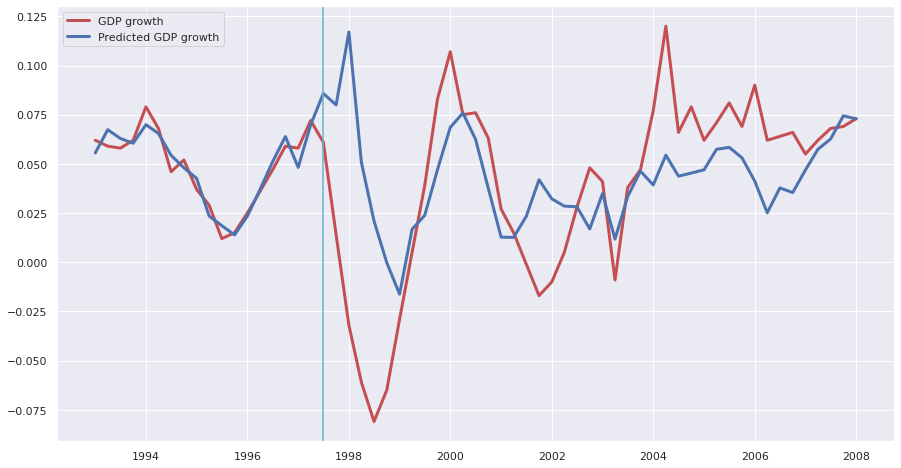

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)
data['year']=pd.to_datetime(data['time'])
plt.plot(data['year'],data['HongKong'],c='r', lw=3, label='GDP growth')
plt.plot(data['year'],data['predict_HongKong'],c='b', lw=3, label='Predicted GDP growth')
plt.legend(loc='upper left', frameon=True)
plt.axvline(pd.to_datetime('1997Q3'),c='c')
plt.show()

以上我们选取了一些国家进行回归，问题是我们并不能保证如此处理是预测效果最好的（没有过拟合、欠拟合）。接下来我们展示在线性回归的基础上进行L1正则化，即Lasso回归的做法：

In [8]:
data=pd.read_csv('csv/hcw.csv')
data['quarter']=pd.to_datetime(data['time'])
data=data.set_index('quarter')
data.index=data.index.to_period('Q')
pre1997=data[data.index<='1997Q2']
## 准备X,y
y=pre1997['HongKong']
X=pre1997.drop(['HongKong','China','time'],axis=1)
## 回归
lasso=linear_model.Lasso(alpha=0.0005, normalize=True)
lasso.fit(X,y)## 训练模型
lasso.coef_

array([ 0.17115713, -0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.51755734, -0.24402465,
        0.08025704, -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.02279413, -0.        ,  0.4039128 ])

选项中的alpha即我们上面提到的$\lambda$，而normalize选项设定为需要进行标准化。可以看到上面很多系数的取值都为0，达到了变量选择的目的。

然而上面的alpha是我们设定的，一个更好的办法是通过交叉验证选取合适的alpha。可以使用LassoCV来做：

In [9]:
lasso_cv=linear_model.LassoCV(eps=1e-5, normalize=True, cv=10, max_iter=1000) #10折交叉验证，最大迭代次数1000次
lasso_cv.fit(X,y)
print("选择的alpha=",lasso_cv.alpha_)
lasso_cv.coef_

选择的alpha= 0.0001834067673217111


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.258303085257561e-07, tolerance: 6.231764705882354e-07
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.533620568722125e-07, tolerance: 6.231764705882354e-07
  positive)


array([ 0.25674511, -0.        ,  0.0041645 ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.54688979, -0.32205779,
        0.03297859, -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.017617  ,  0.        , -0.        ,  0.        ,
       -0.07419455, -0.        ,  0.87332728])

进一步做预测：

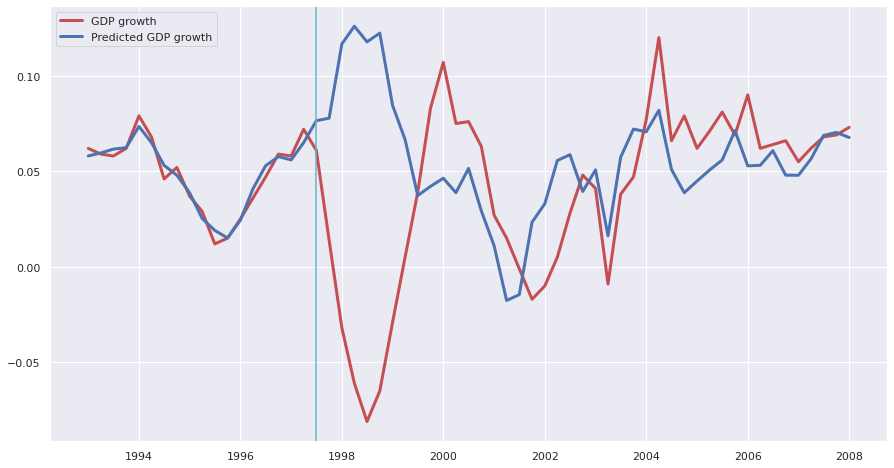

In [10]:
pred_set=data.drop(['HongKong','China','time'],axis=1)
predicted=lasso_cv.predict(pred_set)
data['predict_HongKong']=predicted
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 8.0)
data['year']=pd.to_datetime(data['time'])
plt.plot(data['year'],data['HongKong'],c='r', lw=3, label='GDP growth')
plt.plot(data['year'],data['predict_HongKong'],c='b', lw=3, label='Predicted GDP growth')
plt.legend(loc='upper left', frameon=True)
plt.axvline(pd.to_datetime('1997Q3'),c='c')
plt.show()

## Logistic回归

Logistic回归（Logit回归）是非常常用的解决二分类问题的统计方法，在计量经济学中也有广泛的应用。

由于Logistic回归非常常见，我们在此就不再详细介绍其技术细节，我们以预测女性是否退出劳动力市场为例，介绍其用法：

In [11]:
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()

,persnr,year,employment,chld6,chld16,age,income,husworkhour,husemployment,region,edu,husedu
0,9401,2008,[1] Employed 1,0,0,48,50682,1923,1,0,13.0,12.0
1,9401,2009,[1] Employed 1,0,0,49,45880,2078,1,0,13.0,12.0
2,9401,2010,[1] Employed 1,0,0,50,48690,2078,1,0,13.0,12.0
3,9401,2011,[1] Employed 1,0,0,51,52832,2494,1,0,13.0,12.0
4,9401,2012,[1] Employed 1,0,0,52,55790,2078,1,0,13.0,12.0


In [12]:
import numpy as np

data=raw_data.set_index(['persnr','year'])
data['log_income']=np.log(data['income'])
data['age2']=np.power(data['age'],2)
data=data.drop('income',axis=1)
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
data.head()

employment  chld6  chld16  age  husworkhour  husemployment   edu  \
persnr year                                                                     
9401   2008        True      0       0   48         1923              1  13.0   
       2009        True      0       0   49         2078              1  13.0   
       2010        True      0       0   50         2078              1  13.0   
       2011        True      0       0   51         2494              1  13.0   
       2012        True      0       0   52         2078              1  13.0   

             husedu  log_income  age2  [1] West-Germany   1  
persnr year                                                  
9401   2008    12.0   10.833326  2304                     0  
       2009    12.0   10.733785  2401                     0  
       2010    12.0   10.793229  2500                     0  
       2011    12.0   10.874872  2601                     0  
       2012    12.0   10.929350  2704                     0

In [13]:
y=data['employment']
X=data.drop('employment',axis=1)
y.mean()

0.8260999254287845

In [14]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression(penalty='none')
LR.fit(X,y)  ## 训练模型
LR.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[-1.06096666e+00, -2.81896152e-01,  1.86446253e-01,
         3.87155651e-04,  6.23513216e-02,  1.03962276e-01,
        -3.50542733e-02, -3.51938557e-01, -2.14296767e-03,
         4.67124110e-01]])

值得注意的是我们特地加了一个选项「penalty='none'」，即没有惩罚项，做普通的Logistic回归。默认情况会使用L2正则化，与我们平常的Logistic回归并不是一回事情，这里需要注意。

模型训练好之后，当然可以计算预测概率：

In [15]:
LR.predict_proba(X)

array([[0.1285558 , 0.8714442 ],
       [0.12053127, 0.87946873],
       [0.12556214, 0.87443786],
       ...,
       [0.19748212, 0.80251788],
       [0.18488262, 0.81511738],
       [0.18197721, 0.81802279]])

注意以上的概率有两列，分别是按照可能的结果排序的（False,True）的概率值，我们希望得到True的概率，所以：

In [16]:
data['prob']=LR.predict_proba(X)[:,1]
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  
persnr  year                                                                  
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444  
        2009  13.0    12.0   10.733785  2401                     0  0.879469  
        2010  13.0    12.0   10.793229  2500                     0  0.874438  
        2011  13.0    12.0   10.874872  2601                     0  0.885250  
        2012  13.0    12.0   10.929350  2704                     0  0.861595  
...            ...     ...         ...   ...                   ...       ...  
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598  
        2009  11.5    11.5   10.079539   576                     0  0.790676  
        2010  11.5    11.5   10.103240   625                     0  0.802518  
        2011  11.5    11.5   10.090880   676                     0  0.815117  
        2012  11.5    11.5   10.242813   729                     0  0.818023  

[6705 rows x 12 columns]

In [17]:
data['pred']=LR.predict(X)
data

employment  chld6  chld16  age  husworkhour  husemployment  \
persnr  year                                                               
9401    2008        True      0       0   48         1923              1   
        2009        True      0       0   49         2078              1   
        2010        True      0       0   50         2078              1   
        2011        True      0       0   51         2494              1   
        2012        True      0       0   52         2078              1   
...                  ...    ...     ...  ...          ...            ...   
8270802 2008        True      0       0   23         2078              1   
        2009        True      0       0   24         2078              1   
        2010        True      0       0   25         2078              1   
        2011        True      0       0   26         2078              1   
        2012        True      0       0   27         2078              1   

               edu  husedu  log_income  age2  [1] West-Germany   1      prob  \
persnr  year                                                                   
9401    2008  13.0    12.0   10.833326  2304                     0  0.871444   
        2009  13.0    12.0   10.733785  2401                     0  0.879469   
        2010  13.0    12.0   10.793229  2500                     0  0.874438   
        2011  13.0    12.0   10.874872  2601                     0  0.885250   
        2012  13.0    12.0   10.929350  2704                     0  0.861595   
...            ...     ...         ...   ...                   ...       ...   
8270802 2008  11.5    11.5   10.264861   529                     0  0.764598   
        2009  11.5    11.5   10.079539   576                     0  0.790676   
        2010  11.5    11.5   10.103240   625                     0  0.802518   
        2011  11.5    11.5   10.090880   676                     0  0.815117   
        2012  11.5    11.5   10.242813   729                     0  0.818023   

              pred  
persnr  year        
9401    2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  
...            ...  
8270802 2008  True  
        2009  True  
        2010  True  
        2011  True  
        2012  True  

[6705 rows x 13 columns]

接下来可以计算一些指标：

In [18]:
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

TP= 5524
TN= 23
FP= 1143
FN= 15
查全率=敏感性= 0.9972919299512547
查准率= 0.8285585720713964
特异性= 0.01972555746140652


包括画出ROC曲线：

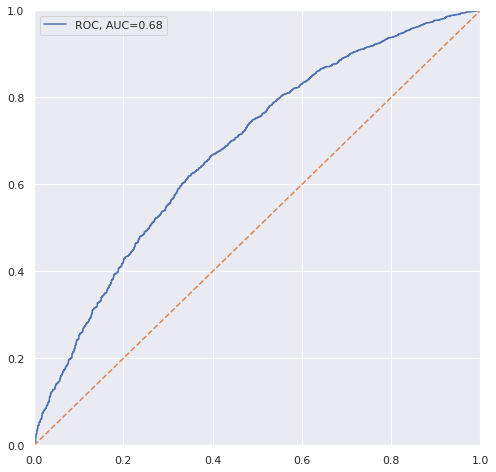

In [19]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

此外，在LogisticRegression中不仅仅支持二分类回归，实际上支持多分类的回归（multinomial logit），可以尝试使用，在这里我们不再赘述。

## 决策树

**决策树**（**decision tree**）是一类非常常见的机器学习算法，如果被预测的变量为离散变量，通常也称**分类树**（**classification tree**），如果被预测的变量为连续变量，通常也称为**回归树**（**regression tree**）。

这类算法的思想是使用一种称为**树**（**tree**）的结构对进行预测，实际上相当于对特征空间进行了一些划分，对于每一块划分的区域可以保证其特征比较类似，因而可以用于预测。

为了直观理解这一算法，我们不妨先借用以上的数据做一个简单的模型：

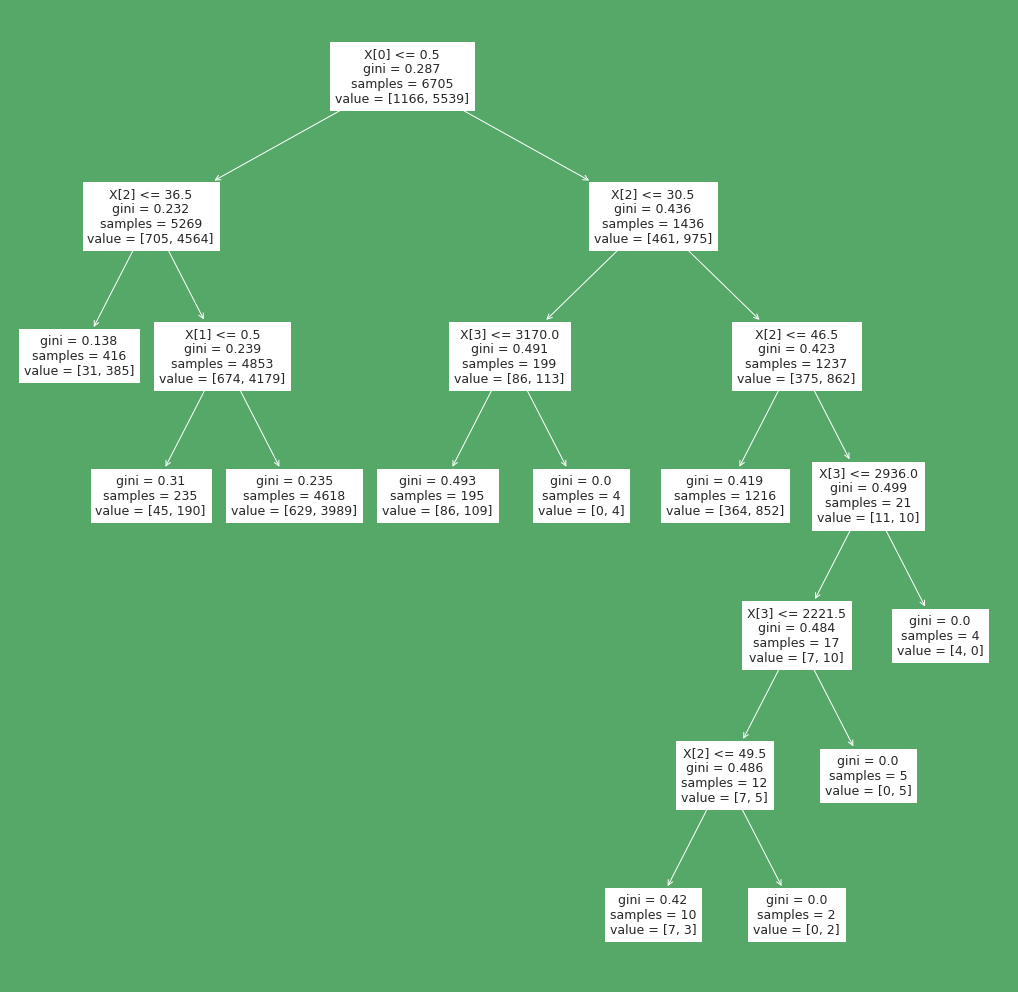

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
dtree=tree.DecisionTreeClassifier(max_leaf_nodes=10) ##设定最大的叶子数，10
X_example=X[['chld6','husemployment','age','husworkhour']] ##先选3个特征，注意特征中age为连续变量
dtree.fit(X_example,y) ##训练
fig, ax = plt.subplots(figsize=(18, 18), facecolor='g')
tree.plot_tree(dtree, ax=ax) ##画图
plt.show()

上图给出了限定叶子数为10的时候的分类树的结果。其中最上层的节点一般称为**根节点**（**root node**），接下来的是若干子节点，而最终没有自己点的称为**叶节点**（**leaf nodes**）。而从每一个子节点开始，都可以看做是一颗新的树，或者**子树**（**subtree**）。

注意到每个节点都有一个value，代表的是在这个节点上两种分类的样本数量。

回归树的原理是，在每一个节点，通过一定算法，找到能够使得分类更加明确的标准，然后根据这一标准进行分类。其中评价分类是否更加明确的指标通常有Gini系数和熵（DecisionTreeClassifier的criterion选项控制，可以选择'gini'或者'entropy'）。

分出子节点后，子节点又可以看做是一颗新的树，继续查看信息的增益（即分类更加明确的标准），继续分类，以此类推。

然而需要注意的是，树不可能无限的延长，过于长的树非常容易导致过拟合问题，因而有必要对树进行**剪枝**（**pruning**）。或者，实践中也可以在模型设定时限制树的大小，比如：

* max_depth: 最大深度，默认不限制
* max_features: 最多取多少特征，默认不限制，可以提供一个整数，也可以选择：
    - 'auto'：等价于'sqrt'
    - 'sqrt'：特征数的开平方
    - 'log2'：log2(特征数)
* max_leaf_nodes: 叶子的最大个数，默认不限制，可以提供一个整数限制
* min_impurity_decrease: 默认为0，只有当Gini系数或者熵的降低大于这个数字时才产生下一个节点，否则就作为叶子节点

分类树最终的结果是对特征空间进行了一些划分，并使用这些划分作为预测。下面的代码中，我们选取了两个特征，然后将两个特征的划分画出来以直观展示这种划分：

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


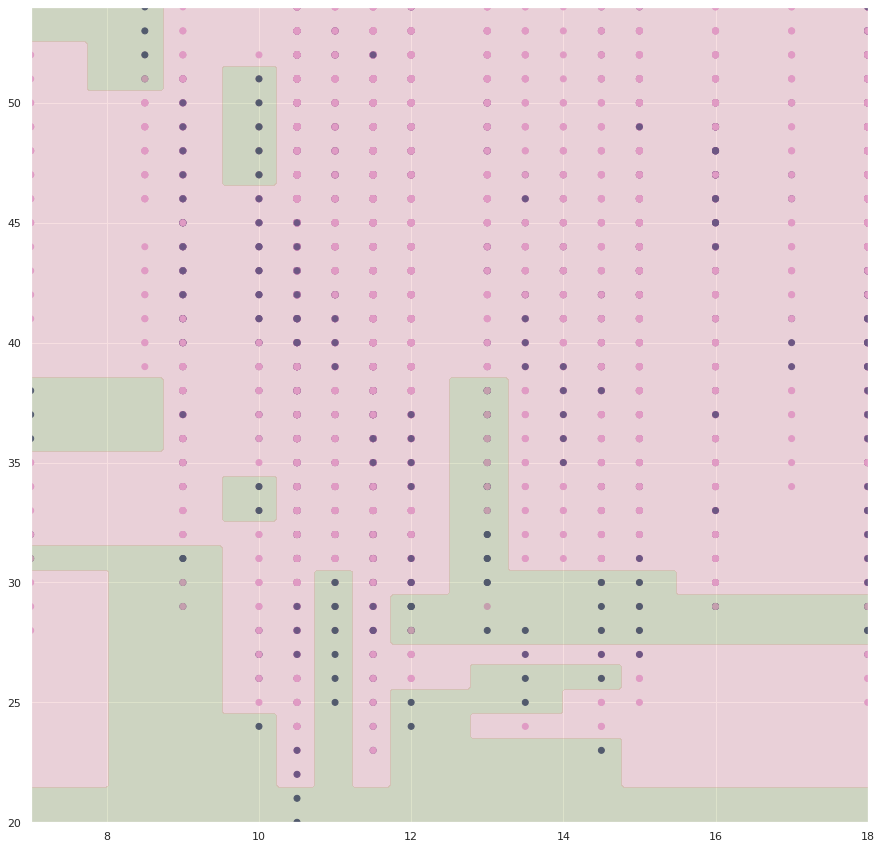

In [21]:
def tree_partion_graph(X, y, figsize_x=15, figsize_y=15):
    import matplotlib.pyplot as plt
    import seaborn as sb
    sb.set()
    plt.rcParams['figure.figsize'] = (figsize_x, figsize_y)
    plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y, cmap='tab20b')
    xx,yy=np.meshgrid(np.linspace(X.iloc[:,0].min(),X.iloc[:,0].max(), num=200),np.linspace(X.iloc[:,1].min(),X.iloc[:,1].max(), num=200))
    xx=xx.reshape(xx.size,1)
    yy=yy.reshape(yy.size,1)
    dtree=tree.DecisionTreeClassifier(max_leaf_nodes=80) ##设定最大的叶子数，10
    dtree.fit(X,y) ##训练
    Z=dtree.predict(np.hstack([xx,yy]))
    plt.xlim(X.iloc[:,0].min(),X.iloc[:,0].max())
    plt.ylim(X.iloc[:,1].min(),X.iloc[:,1].max())
    Z=Z.reshape(200,200)
    xx=xx.reshape(200,200)
    yy=yy.reshape(200,200)
    print(Z)
    plt.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(len(np.unique(y))+1)-0.5,cmap='tab20b',zorder=1)
    plt.show()
    
tree_partion_graph(data[['husedu','age']], data['employment'])

当然，与Logistic回归一样，也可以计算ROC曲线等等：

TP= 5489
TN= 258
FP= 908
FN= 50
查全率=敏感性= 0.9909730998375158
查准率= 0.8580584649054244
特异性= 0.22126929674099485


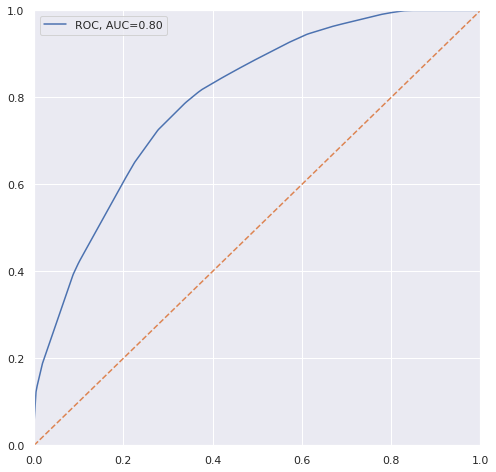

In [22]:
raw_data=pd.read_csv("csv/soep.csv")
raw_data.head()
data=raw_data.set_index(['persnr','year'])
region_dummy=pd.get_dummies(data['region'])
data=pd.concat([data,region_dummy], axis=1)
data=data.drop(['region','0'],axis=1)
data['employment']=data['employment']==data['employment'][0]
y=data['employment']
X=data.drop('employment',axis=1)
dtree=tree.DecisionTreeClassifier(max_depth=8) ##设定最大深度，20
dtree.fit(X,y) ##训练
## 预测及概率
data['prob']=dtree.predict_proba(X)[:,1]
data['pred']=dtree.predict(X)
## 计算指标
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

## 画图
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

需要注意的是，以上虽然看起来好像AUC提高了很多，但是其实这可能是由于过拟合导致的。如果对样本外做ROC曲线并进行比较可能更加能反应模型的好坏。

最后，决策树也可以做回归，即sklearn.tree.DecisionTreeRegression()，这里不再赘述。

## 随机森林

决策树虽然看起来是一种非常flexible的建模方法，但是也面临着过拟合等问题，剪枝策略也非常容易影响最终效果。为了解决这些问题，我们可以在决策树的基础上进行进一步拓展。

其中的一种做法是**bagging**。Bagging首先通过自助法（bootstrap）的方法对**样本**进行**有放回**抽样（从而抽样得到的样本是可以重复的）抽出$m$个样本，然后使用抽样的样本训练数据集，得到一个模型。

重复以上步骤M次，就可以得到$M$个模型，使用这$M$个模型可以得到$M$个预测结果，然后使用这$M$个预测结果投票即可得到最终结果。

此外，由于Bagging采用了有放回抽样，因而样本中有的样本被抽到多次，有的没有抽到，此时剩下的没有抽到的样本可以用来度量样本外预测能力，即包外估计（out-of-bag estimate）。

以上思路不仅仅对决策树可行，很多机器学习算法都可以使用以上方法改进预测。

在bagging的基础上，**随机森林**（**random forest**）更近了一步。Bagging仅仅在样本中进行有放回抽样，而随机森林则进一步在特征空间中随机抽取特征，即同样重复建立$M$个决策树，每个决策树随机挑选$k$个特征，并使用有放回的抽样方法抽取样本，训练模型。最终$M$个模型通过平均、投票的方式得到最终的估计。一般而言，$k$的选取可以使用一个rule of thumb: $k=\log_2 K$

随机森林实现非常简单，计算量也不大，重要的是预测效果非常好！

比如对于以上数据，使用scikit-learn可以轻松完成随机森林的建模：

TP= 5539
TN= 1056
FP= 110
FN= 0
查全率=敏感性= 1.0
查准率= 0.9805275269959285
特异性= 0.9056603773584906


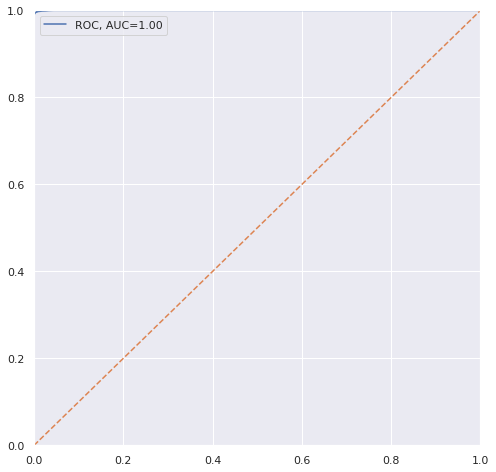

In [23]:
from sklearn.ensemble import RandomForestClassifier
##100颗树，每次bootstrap选取60%样本，特征数量为总数量的log2，本例中总共9个特征所以每个模型为3
rfc=RandomForestClassifier(n_estimators=100, max_samples=0.6, max_features='log2')
rfc.fit(X,y)
## 预测及概率
data['prob']=rfc.predict_proba(X)[:,1]
data['pred']=rfc.predict(X)
## 计算指标
TP=np.sum(data['employment'] & data['pred'])
TN=np.sum((~data['employment'] & (~data['pred'])))
FP=np.sum((~data['employment'] & (data['pred'])))
FN=np.sum((data['employment']) & (~data['pred']))

print("TP=",TP)
print("TN=",TN)
print("FP=",FP)
print("FN=",FN)
print("查全率=敏感性=",TP/(TP+FN))
print("查准率=",TP/(TP+FP))
print("特异性=",TN/(TN+FP))

## 画图
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(data['employment'], data['prob'])
roc_auc = auc(fpr, tpr)
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.plot(fpr,tpr,label='ROC, AUC=%.2f' % roc_auc)
plt.legend(loc='upper left', frameon=True)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()